In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
user = "aabounak"
password = "mysecretpassword"
host = "localhost"
port = "5432"
database = "piscineds"

def connect_to_postgres():
  return create_engine(
    url=f"postgresql://{user}:{password}@{host}:{port}/{database}"
  )

In [3]:
engine = connect_to_postgres()

In [23]:
with engine.connect() as connection:
  result = connection.execute(text('select * from customers'))
  data = result.fetchall()

columns_names = result.keys()
df = pd.DataFrame(data, columns=columns_names)
df.head()

### Exercise 00

<Axes: ylabel='count'>

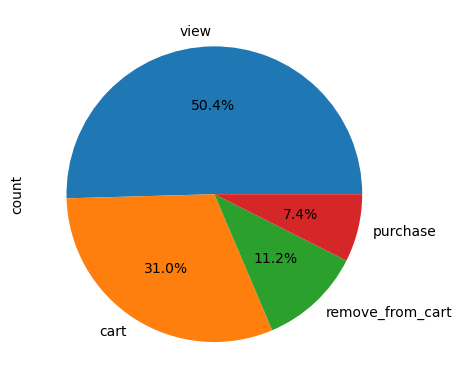

In [9]:
df['event_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Exercise 01

In [20]:
df['event_time'] = pd.to_datetime(df['event_time'])
filtered_data = df[(df['event_type'] == 'purchase')]


<Axes: xlabel='Date', ylabel='Number of customers'>

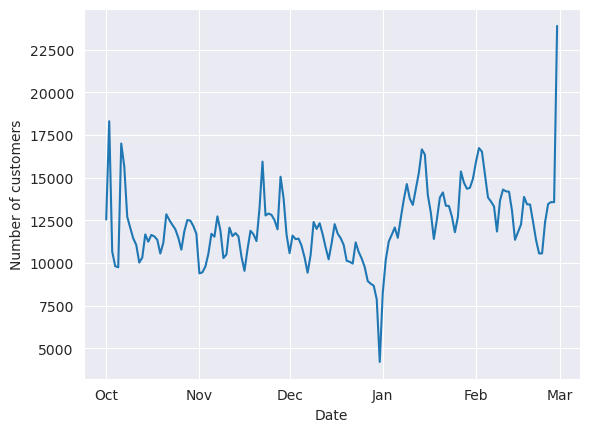

In [21]:
df['year'] = df['event_time'].dt.year
df['month'] = df['event_time'].dt.month
df['day'] = df['event_time'].dt.day

daily_customer_counts = df.groupby(['year', 'month', 'day'])['user_id'].nunique().reset_index()
daily_customer_counts['date'] = pd.to_datetime(daily_customer_counts[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1))

sns.set_style('darkgrid')
plt.ylabel('Number of customers')
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
sns.lineplot(data=daily_customer_counts, x='date', y='user_id')

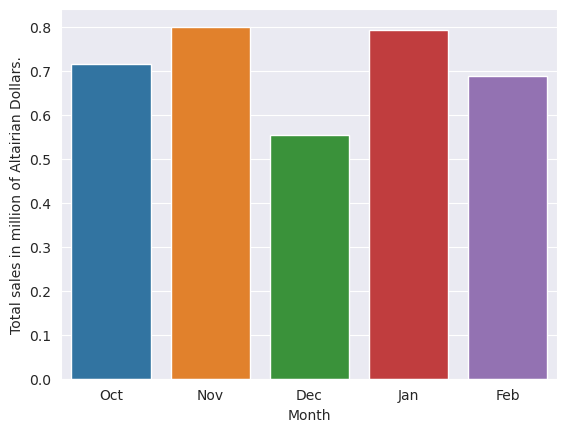

In [22]:
agg_data = filtered_data.resample('M', on='event_time').agg({
    'event_type': 'count',
    'price': 'sum'
}).reset_index()

agg_data['event_time'] = agg_data['event_time'].dt.strftime('%b')

sns.set_style('darkgrid')
sns.barplot(data=agg_data, x='event_time', y='price')

def formatter(x, pos):
    return f'{x / 1000000}'

y_formatter = mtick.FuncFormatter(formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.xlabel('Month')
plt.ylabel('Total sales in million of Altairian Dollars.')
plt.show()
